#### Imports

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import os, pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

#### Variables Declaration

In [6]:
cwd = os.getcwd()
project_dir = os.path.join(cwd, "..")
data_filepath = os.path.join(project_dir, "data", "quikr_car.csv")

def format_func(value, tick_number):
    return f'{int(value):,}'

#### Data Loading, Cleaning & EDA

##### Loading

In [7]:
df = pd.read_csv(data_filepath)
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [9]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

##### Cleaning

Findings:
- We've null values
- Price has Ask For Price and contains commas inside price
- Kms has kms with each value and contains commas
- We've to use only 1st 3 words of the name
- year has some non-year values
- company has some numerical values
- fuel_type has nan values
- convert all values to int.

In [10]:
df.shape

(892, 6)

In [11]:
df = df.dropna()

In [12]:
df = df.drop_duplicates()

In [13]:
df = df[df['Price']!='Ask For Price']
df['Price'] = df['Price'].str.replace(",", "")

In [14]:
df['kms_driven'] = df['kms_driven'].str.split(" ").str[0].str.replace(",", "")

In [15]:
df['name'] = df['name'].str.split(" ").str[:3].str.join(" ")

In [16]:
df[['year', 'Price', 'kms_driven']] = df[['year', 'Price', 'kms_driven']].astype('Int32')

In [17]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        724 non-null    object
 1   company     724 non-null    object
 2   year        724 non-null    Int32 
 3   Price       724 non-null    Int32 
 4   kms_driven  724 non-null    Int32 
 5   fuel_type   724 non-null    object
dtypes: Int32(3), object(3)
memory usage: 33.2+ KB


In [19]:
df.to_csv(os.path.join(project_dir, "data", "cleaned-quikr-car.csv"))

##### EDA

In [52]:
df.describe()

,year,Price,kms_driven
count,724.0,724.0,724.0
mean,2012.321823,403245.063536,46791.342541
std,4.12294,480293.587971,34575.416435
min,1995.0,30000.0,0.0
25%,2010.0,165000.0,27000.0
50%,2013.0,290000.0,42000.0
75%,2015.0,489999.0,59000.0
max,2019.0,8500003.0,400000.0


In [65]:
# removing outlier with price 8500003
df = df[df['Price']<4000000]

In [68]:
df['year'].unique()

<IntegerArray>
[2007, 2006, 2014, 2012, 2013, 2016, 2015, 2010, 2017, 2008, 2018, 2011, 2019,
 2009, 2005, 2000, 2003, 2004, 1995, 2002, 2001]
Length: 21, dtype: Int32

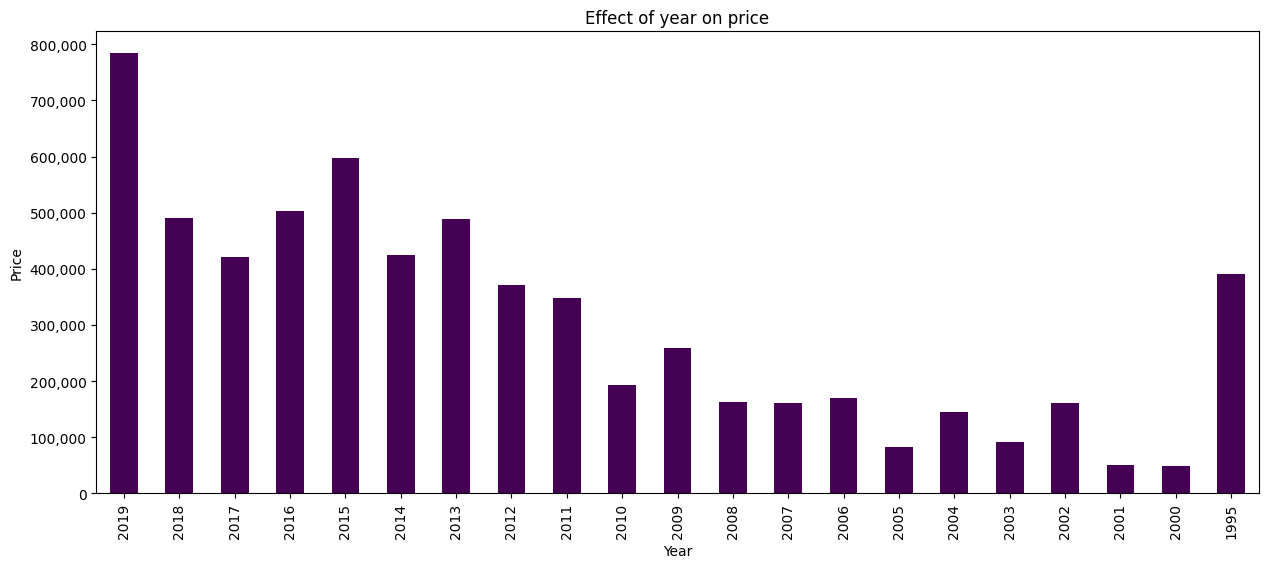

In [122]:
mean_prices = df.groupby("year")['Price'].mean().sort_index(ascending=False)

plt.figure(figsize=(15,6))
mean_prices.plot.bar(colormap='viridis')
plt.title("Effect of year on price")
plt.ylabel("Price")
plt.xlabel("Year")
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.savefig("effect-of-year-on-price.png")
plt.show()

After 2000, there is somewhat increasing trend.

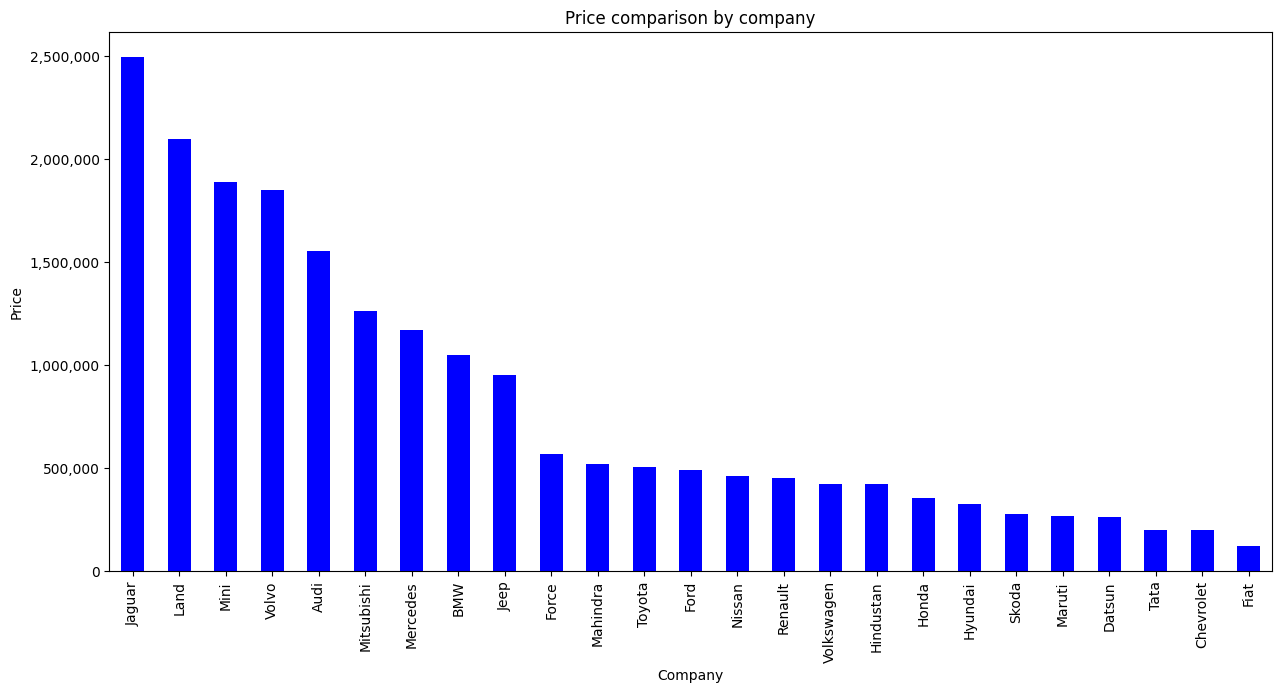

In [123]:
mean_prices = df.groupby("company")['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(15,7))
mean_prices.plot.bar(color='blue')
plt.title("Price comparison by company")
plt.ylabel("Price")
plt.xlabel("Company")
# Format y-axis labels
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.savefig("price-comparison-by-company.png", bbox_inches='tight')
plt.show()

The relation is kind of expected. Expensive brands have more prices.

In [ ]:
df['kms_driven'].describe()

In [ ]:
df = df[df['kms_driven'] < 200000]

c:\Users\Dmm\anaconda3\envs\data-science\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\Dmm\anaconda3\envs\data-science\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


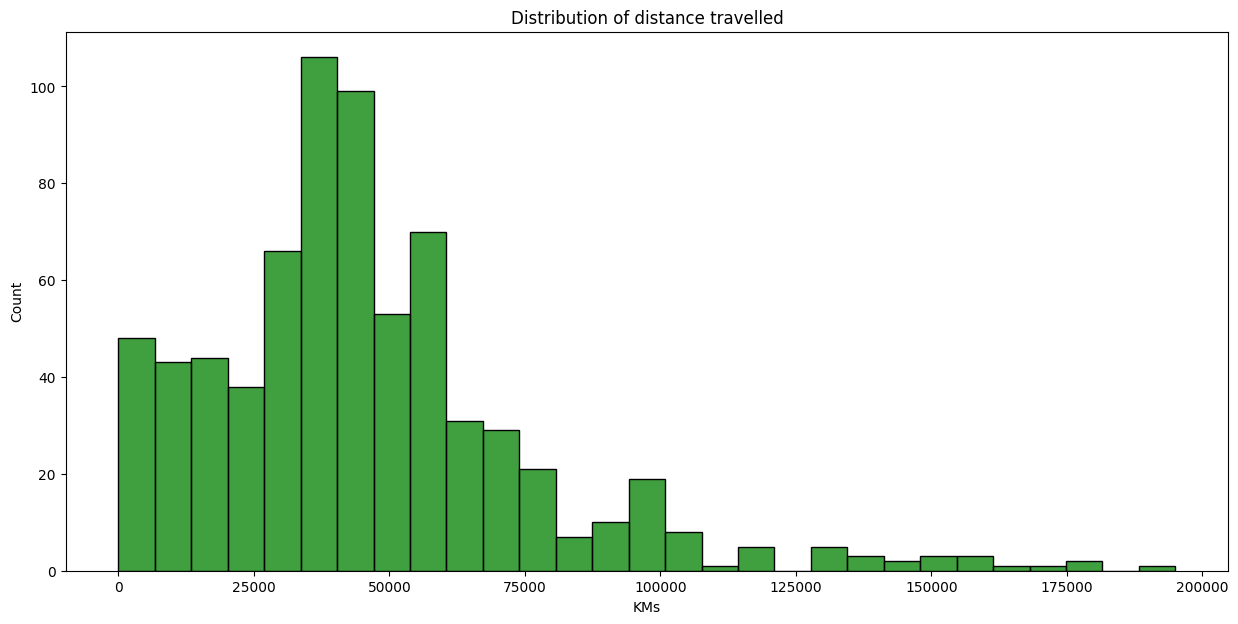

In [125]:
plt.figure(figsize=(15,7))
sns.histplot(df['kms_driven'], color='green')
plt.title("Distribution of distance travelled")
plt.xlabel("KMs")
plt.savefig("distribution-of-distance-travelled")
plt.show()

Most of the cars are driven less than 60000 kms.

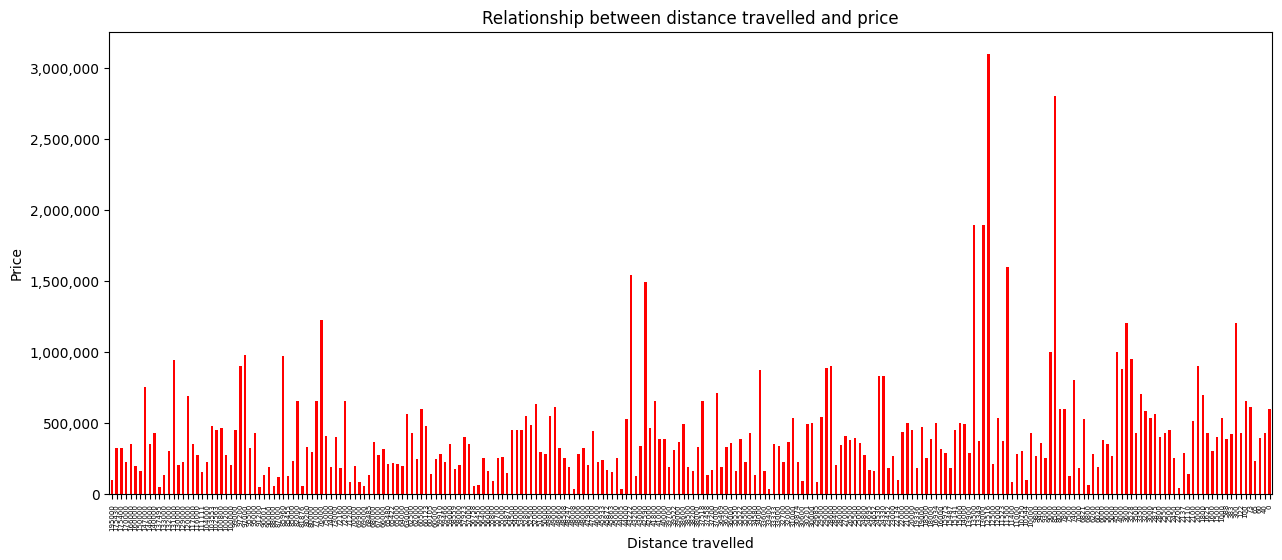

In [126]:
mean_prices = df.groupby("kms_driven")['Price'].mean().sort_index(ascending=False)

plt.figure(figsize=(15,6))
mean_prices.plot.bar(color='red')
plt.title("Relationship between distance travelled and price")
plt.ylabel("Price")
plt.xlabel("Distance travelled")
plt.xticks(rotation=90, fontsize=5)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.savefig("price-comparison-by-distance-travelled.png", bbox_inches='tight')
plt.show()

#### Model Building

##### Initial Training

In [20]:
df.head(1)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol


In [33]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Price', axis=1), df['Price'], test_size=0.1, random_state=20)

In [34]:
y_test.head()

873    325000
535    350000
253    178000
310    299999
234    390000
Name: Price, dtype: Int32

In [35]:
df['name'].value_counts()

Maruti Suzuki Swift         46
Maruti Suzuki Alto          40
Maruti Suzuki Wagon         26
Maruti Suzuki Ertiga        15
Hyundai Santro Xing         14
                            ..
Hyundai Sonata Transform     1
Nissan Micra XV              1
Chevrolet Beat               1
Volkswagen Vento Konekt      1
Tata Zest XM                 1
Name: name, Length: 254, dtype: int64

In [36]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(x_train[['name', 'company', 'fuel_type']])
categories = ohe.categories_

column_transformer = make_column_transformer((OneHotEncoder(categories=categories, handle_unknown='ignore'), ['name', 'company', 'fuel_type']), remainder='passthrough')
model = LinearRegression()
model_pipeline = make_pipeline(column_transformer, model)

In [37]:
model_pipeline.fit(x_train, y_train)
y_pred = model_pipeline.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(np.sqrt(mse), r2)

183910.63089041595 0.6582602808441687


The root mean squared error is: 183910.6 and r2_score is: 65.8 %

##### Optimization

In [39]:
rmses = []
r2s = []
for i in range(500):
    x_train, x_test, y_train, y_test = train_test_split(df.drop('Price', axis=1), df['Price'], test_size=0.1, random_state=i)
    
    model = LinearRegression()
    model_pipeline = make_pipeline(column_transformer, model)
    model_pipeline.fit(x_train, y_train)
    y_pred = model_pipeline.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    rmses.append(rmse)
    r2s.append(r2)

In [46]:
print("Smallest rmse:", rmses[np.argmin(rmses)])
print("Highest r2_score:", r2s[np.argmax(r2s)])

Smallest rmse: 137696.46237995266
Highest r2_score: 0.8154190783021158


In [50]:
print("Best random_state using mean_squared_error:",np.argmin(rmses))
print("Best random_state using r2_score:",np.argmax(r2s))

Best random_state using mean_squared_error: 110
Best random_state using r2_score: 342


##### Retraining with optimized params

In [51]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Price', axis=1), df['Price'], test_size=0.1, random_state=342)
model_pipeline = make_pipeline(column_transformer, model)
model_pipeline.fit(x_train, y_train)
y_pred = model_pipeline.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("R2 score:",r2)

R2 score: 0.8154190783021158


In [55]:
pickle.dump(model_pipeline, open(os.path.join("resources", "model_pipeline.pkl"), "wb"))

#### Inferencing

In [63]:
user_input = pd.DataFrame([['Hyundai Santro Xing', 'Hyundai', 2020, 0, "Diesel"]], columns=['name', 'company', 'year', 'kms_driven', 'fuel_type'])
user_input.head()

model_pipeline = pickle.load(open(os.path.join("resources", "model_pipeline.pkl"), "rb"))
model_pipeline.predict(user_input)

array([571309.71173906])

#### Known Categories

In [72]:
# extracting known categories
model_pipeline.steps[0][1].transformers[0][1].categories

[array(['Audi A3 Cabriolet', 'Audi A4 2.0', 'Audi A6 2.0', 'Audi A8',
        'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 xDrive20d',
        'Chevrolet Beat', 'Chevrolet Beat Diesel', 'Chevrolet Beat LS',
        'Chevrolet Beat LT', 'Chevrolet Beat PS', 'Chevrolet Cruze LTZ',
        'Chevrolet Enjoy 1.4', 'Chevrolet Sail 1.2', 'Chevrolet Sail UVA',
        'Chevrolet Spark', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        'Ford Figo Diesel', 'Ford Figo Duratorq', 'Ford Figo Petrol',
        'Ford Ikon 1.3',